In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import RICO data 
file_path = 'RICO4_Dataset.hdf'
df = pd.read_hdf(file_path)
# Create intervals of 240 minutes
df['interval'] = ((df.index - df.index[0]) // pd.Timedelta(minutes=240)).astype(int)
df['time_within_interval'] = ((df.index - df.index[0]).total_seconds() / 60 % 240 + 1).astype(int)
# df[['Scheduler Step','time_within_interval']]

### Heating and cooling data

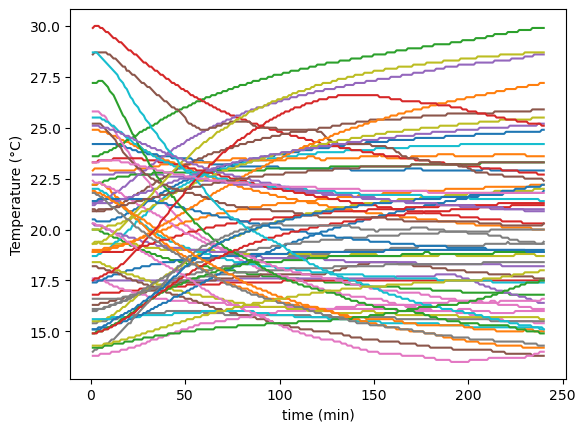

In [3]:
for i in df['interval'].unique():
    id = df['interval'] == i
    plt.plot(df[id]['time_within_interval'].to_numpy(), df[id]['B.RTD1'].to_numpy())
plt.xlabel('time (min)')
plt.ylabel('Temperature (°C)')
plt.show()

In [4]:
### Calsify heating and cooling curves according to the temperature difference

In [5]:
def classify_temp_change(group):
    # Calculate the temperature difference from the first to the last point in each interval
    temp_diff = group['B.RTD1'].iloc[-1] - group['B.RTD1'].iloc[0]
    return 'h' if temp_diff > 0 else 'c'

# Apply this function to each time interval group and create a dictionary 
# mapping each interval to its temperature change classification
# temp_change_classification = df.groupby('interval').apply(classify_temp_change)
temp_change_classification = df.groupby('interval', group_keys=False).apply(classify_temp_change, include_groups=False)

df['temp_change_class'] = df['interval'].map(temp_change_classification)


In [6]:
df.to_hdf('RICO4_Dataset_processed.hdf', key='df', mode='w')